In [70]:
from sklearn import datasets
from sklearn.decomposition import PCA
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.ensemble import RandomForestClassifier
import time

In [55]:
lfw=datasets.fetch_lfw_people(min_faces_per_person=100, resize=0.4)
x=lfw.data
y=lfw.target
x_train, x_test, y_train, y_test=train_test_split(x, y, random_state=1)

In [56]:
lfw.keys()

dict_keys(['data', 'images', 'target', 'target_names', 'DESCR'])

In [57]:
x.shape

(1140, 1850)

In [58]:
lfw.images.shape

(1140, 50, 37)

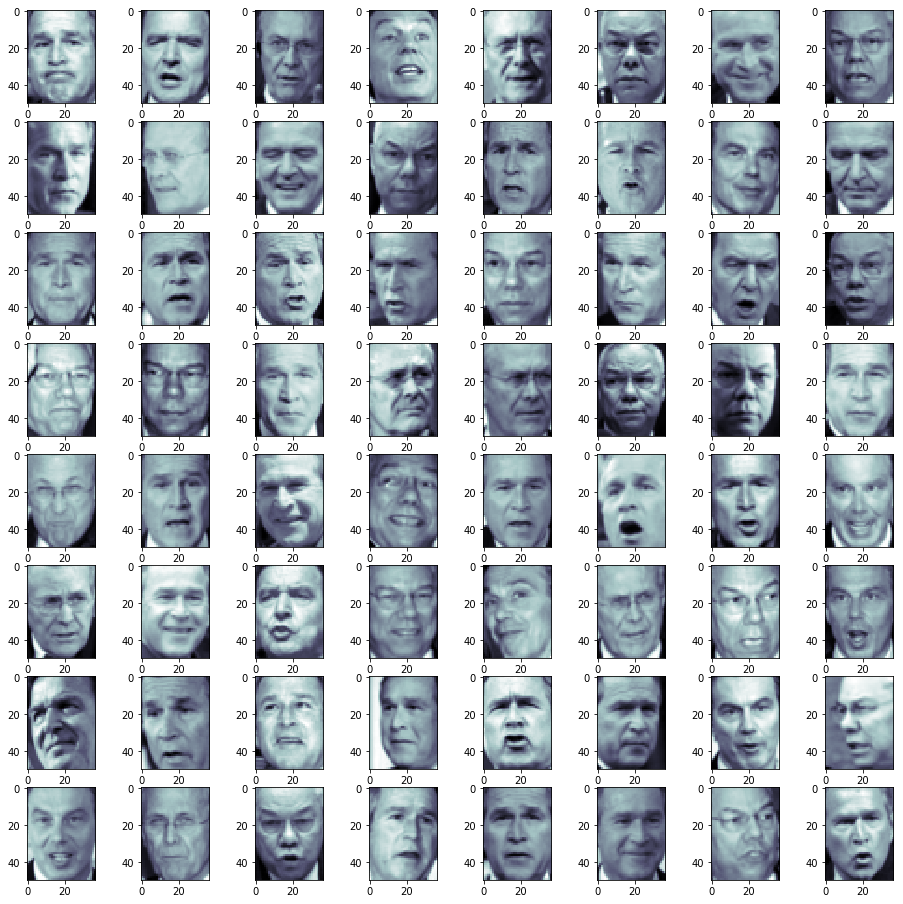

In [59]:
fig=plt.figure(figsize=(16, 16))
for i in range(64):
    ax=fig.add_subplot(8, 8, i+1)
    ax.imshow(lfw.images[i], cmap=plt.cm.bone)
plt.show()

In [60]:
pca_lfw=PCA()
pca_lfw.fit(x_train)

PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

In [61]:
k=0
total=sum(pca_lfw.explained_variance_)
current=0
while current/total<0.99:
    current+=pca_lfw.explained_variance_[k]
    k+=1
k

317

In [62]:
pca_lfw=PCA(n_components=k, whiten=True)
transformed=pca_lfw.fit_transform(x_train)

In [63]:
transformed.shape

(855, 317)

In [64]:
inverse_transformed_x=pca_lfw.inverse_transform(transformed)
inverse_transformed_x.shape

(855, 1850)

In [66]:
inverse_transformed_x=inverse_transformed_x.reshape((855, 50, 37))

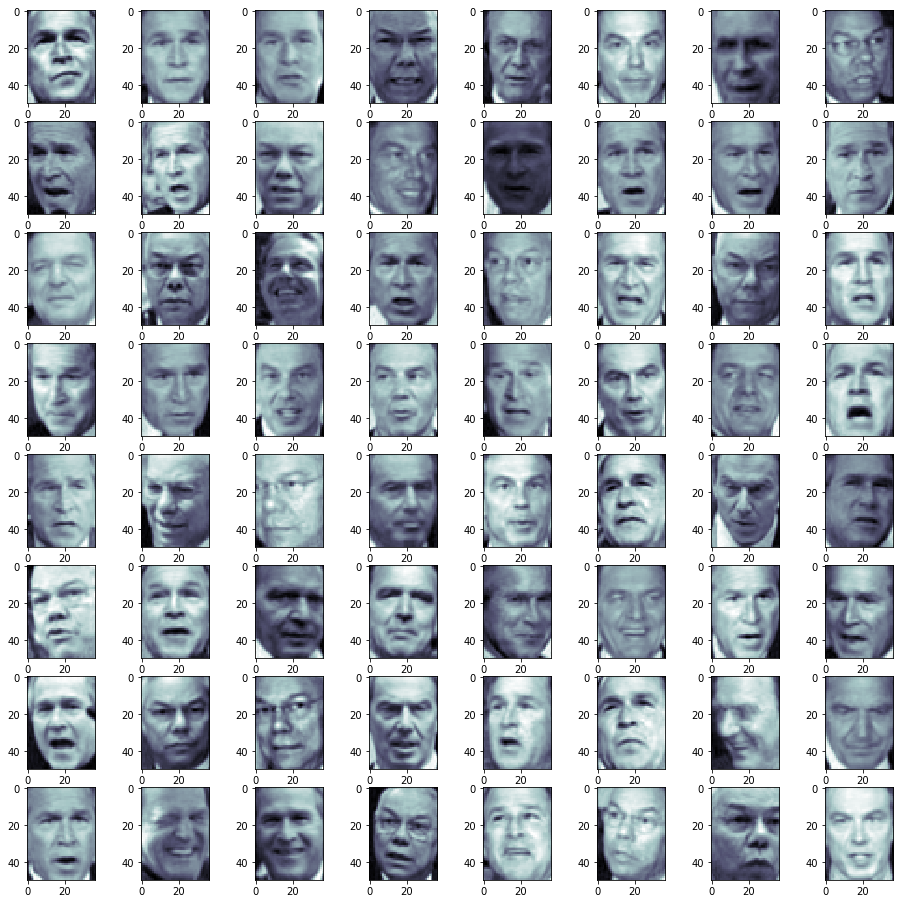

In [67]:
fig=plt.figure(figsize=(16, 16))
for i in range(64):
    ax=fig.add_subplot(8, 8, i+1)
    ax.imshow(inverse_transformed_x[i], cmap=plt.cm.bone)
plt.show()

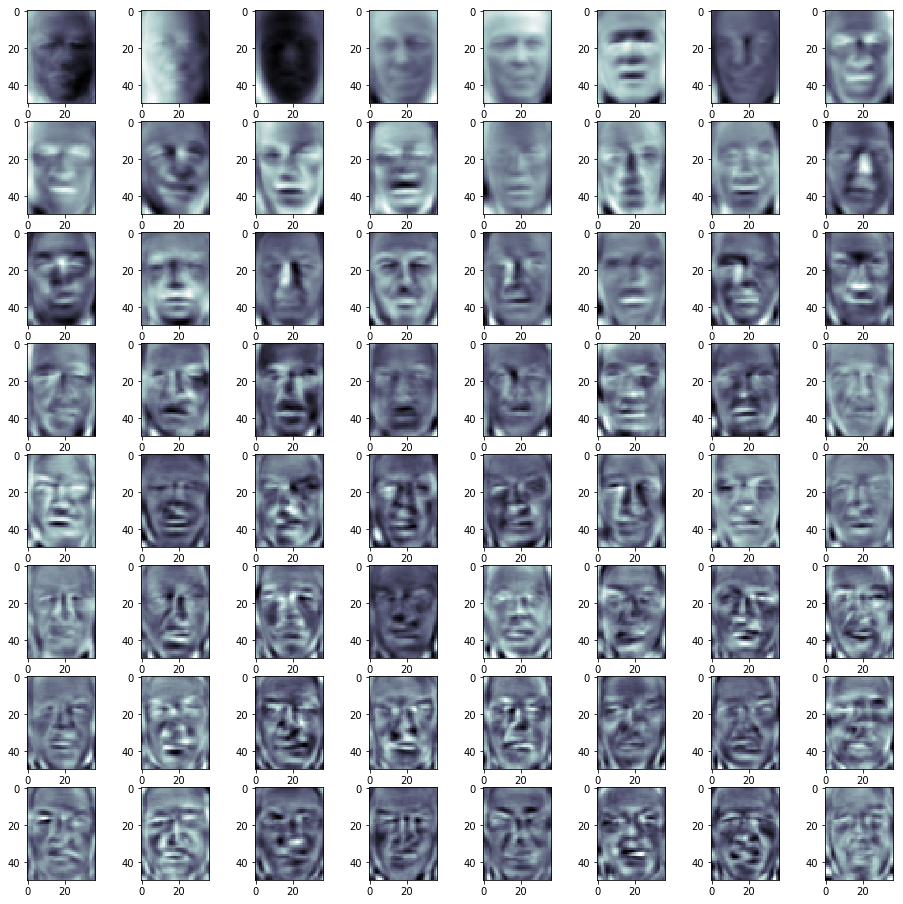

In [68]:
pca_lfw.components_.shape
eigen_values=pca_lfw.components_.reshape(k, 50, 37)
fig=plt.figure(figsize=(16, 16))
for i in range(64):
    ax=fig.add_subplot(8, 8, i+1)
    ax.imshow(eigen_values[i], cmap=plt.cm.bone)
plt.show()

In [69]:
x_train_pca=transformed
x_test_pca=pca_lfw.transform(x_test)

In [77]:
rf=RandomForestClassifier()
start=time.time()
rf.fit(x_train, y_train)
end=time.time()
print(end-start)
y_predicted=rf.predict(x_test)
print(classification_report(y_test, y_predicted))
print()
print(rf.score(x_test, y_test))
print()
print(confusion_matrix(y_test, y_predicted))

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


0.26378893852233887
              precision    recall  f1-score   support

           0       0.56      0.62      0.59        53
           1       0.41      0.33      0.37        21
           2       0.65      0.88      0.75       139
           3       0.56      0.14      0.23        35
           4       0.62      0.22      0.32        37

   micro avg       0.61      0.61      0.61       285
   macro avg       0.56      0.44      0.45       285
weighted avg       0.60      0.61      0.57       285


0.6140350877192983

[[ 33   2  17   0   1]
 [  7   7   6   0   1]
 [ 10   4 122   2   1]
 [  4   4  20   5   2]
 [  5   0  22   2   8]]
